## Stage 1: Installing dependencies and notebook gpu setup

## Stage 2: Importing dependencies for the project

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10 #using cifar10 dataset

%matplotlib inline
tf.__version__

'2.17.0'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [27]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] #10 classes https://www.cs.toronto.edu/~kriz/cifar.html

In [28]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #as we have this dataset in keras, we can use load_data()

### Image normalization

In [29]:
X_train = X_train / 255.0 #all the pixels within 0 to 1

In [30]:
X_train.shape #4D (index of the image (50000), Pixels in 2D Array (32,32),corresponds to the RGB format containing red, green, blue (3) )

(50000, 32, 32, 3)

In [31]:
X_test = X_test / 255.0 #keeping all the pixels within 0 to 1

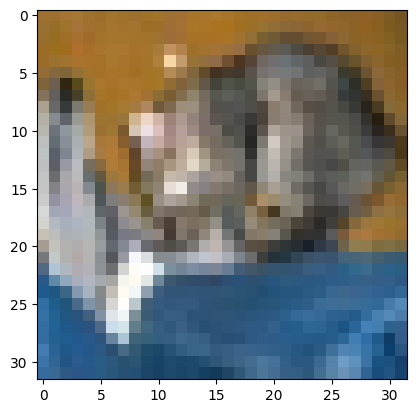

In [32]:
plt.imshow(X_test[0]) #plot 0th image from X_test set; Change the index value when needed

## Stage 4: Building a Convolutional neural network

### Defining the model

In [33]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)

32 filters of size 3*3, padding (same/valid) , relu as activation function ( good for hidden layers), input size is the remaining parts after the index of training set (X_train.shape had (50000,32,32,3))


In [34]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3])) #convolution layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [35]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu")) #second convolutional layer

In [36]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid')) #maxpooling layer with hyperparameters.
#We may use valid as padding in maxpooling as it's okay to lose information in maxpooling but we don't want to lose info in convolutional layer
#Thus we keep 'same' as padding in convolutional layer . Using maxpooling, we get the max values.

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64 filters (changed )
    kernel_size:3
    padding: same
    activation: relu
    input_shape: (32, 32, 3)


In [37]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")) #convolutional layer

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [38]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu")) #convolutional layer

In [39]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid')) #maxpooling layer

### Adding the Flatten layer

When transitioning from convolutional layers to fully connected layers, flatten's primary function is to reshape a multi-dimensional input into a one-dimensional array

In [40]:
model.add(tf.keras.layers.Flatten())  #makes it 1D

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [41]:
model.add(tf.keras.layers.Dense(units=128, activation='relu')) #Adding the 1D to the first layer

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [42]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax')) #10 neurons as we have 10 classes and as softmax works for multiclass, we use that in activation.

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [47]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [51]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3950 - sparse_categorical_accuracy: 0.8588
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.3168 - sparse_categorical_accuracy: 0.8883
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2361 - sparse_categorical_accuracy: 0.9180
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1954 - sparse_categorical_accuracy: 0.9301
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1464 - sparse_categorical_accuracy: 0.9502
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1284 - sparse_categorical_accuracy: 0.9550
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1125 - sparse_categorical_accuracy: 0.9604
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0993 - sparse_categorical_accuracy: 0.9653
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0969 - sparse_categorical_accuracy: 0.9670
Epoch 10/15
1563/1563 ━━━━━━━━━━

### Model evaluation and prediction

In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1348 - sparse_categorical_accuracy: 0.7252


In [54]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7206000089645386
